## 1 Imports

In [68]:
import numpy as np
import pandas as pd

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# for generating data
from sklearn.datasets import make_blobs

## 1.1 Getting the data in a DataFrame

In [69]:
# total number of data samples
samples = 2000
# total clusters
centers = 2
# dimensions 
features = 2

X, y = make_blobs(n_samples= samples,
                  centers=centers,
                  n_features= features,
                 random_state=1234)

datapoints = {}
for i in range(0, X.shape[1]):
    datapoints[f"f{i + 1}"] = X[:, i]
    
df = pd.DataFrame(data = datapoints)
df["class"] = y

In [70]:
df.head(5)

,f1,f2,class
0,-1.298199,5.942987,1
1,-2.552513,6.432693,1
2,-1.433165,6.902266,1
3,-8.361905,2.330574,0
4,-0.440290,6.860895,1


## 1.2 Visualising the data

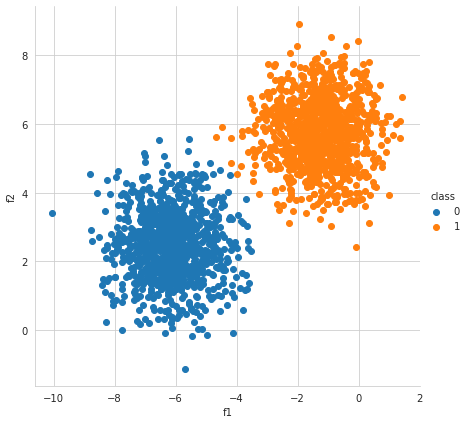

In [71]:
sns.set_style("whitegrid")
sns.FacetGrid(df,
             hue= "class",
             height=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

## 2.0 Implementing Kmeans clustering

In [72]:
# Kmeans loss
def kmeans_loss(centroid_dict, assignemt_dict):
    mean_distances = []
    for c_name, cent_point in centroid_dict.items():
        distances = []
        for cluster_points in assignemt_dict[c_name]:
            d = np.linalg.norm(cluster_points-cent_point)
            distances.append(d)
        
        m = np.mean(np.array(distances))
        mean_distances.append(m)
    return round(sum(mean_distances), 3)

In [73]:
#  Lloyd's algorithm to implement KMEANS
def Kmeans(input_variables, n_centroids, max_iter = 50):
    rows, dimension = input_variables.shape
    index = np.random.choice(input_variables.shape[0], n_centroids, replace=False)
    centroids = {f"C{i + 1}" : input_variables[i] for i in range(0, n_centroids)}
    
    for i in range(1, max_iter + 1):
        assignment_dict = {f"C{k + 1}" : list() for k in range(0, n_centroids)}
        for x_point in input_variables:
            temp = {}
            for centroid_name, centroid in centroids.items():
                distance = np.linalg.norm(centroid-x_point)
                temp[centroid_name] = distance
            temp = dict(sorted(temp.items(), key=lambda item: item[1]))
            closest_cent_name = list(temp.keys())[0]
            assignment_dict[closest_cent_name].append(x_point)
            
        centroids = {}
        for j in range(0, n_centroids):
            centroids[f"C{j + 1}"] = np.mean(np.array(assignment_dict[f"C{j + 1}"]), axis = 0)
            
        loss = kmeans_loss(centroid_dict = centroids, assignemt_dict = assignment_dict)
        print(f"Steps: {i}:, Loss: {loss}")
     
    return np.array(list(centroids.values())), loss

## 2.1 Applying Kmeans clustering to the data

In [74]:
# training the KMEANS model
learned_centroids, loss = Kmeans(input_variables = X,
                           n_centroids = centers,
                           max_iter = 100)

Steps: 1:, Loss: 3.102
Steps: 2:, Loss: 2.476
Steps: 3:, Loss: 2.472
Steps: 4:, Loss: 2.472
Steps: 5:, Loss: 2.472
Steps: 6:, Loss: 2.472
Steps: 7:, Loss: 2.472
Steps: 8:, Loss: 2.472
Steps: 9:, Loss: 2.472
Steps: 10:, Loss: 2.472
Steps: 11:, Loss: 2.472
Steps: 12:, Loss: 2.472
Steps: 13:, Loss: 2.472
Steps: 14:, Loss: 2.472
Steps: 15:, Loss: 2.472
Steps: 16:, Loss: 2.472
Steps: 17:, Loss: 2.472
Steps: 18:, Loss: 2.472
Steps: 19:, Loss: 2.472
Steps: 20:, Loss: 2.472
Steps: 21:, Loss: 2.472
Steps: 22:, Loss: 2.472
Steps: 23:, Loss: 2.472
Steps: 24:, Loss: 2.472
Steps: 25:, Loss: 2.472
Steps: 26:, Loss: 2.472
Steps: 27:, Loss: 2.472
Steps: 28:, Loss: 2.472
Steps: 29:, Loss: 2.472
Steps: 30:, Loss: 2.472
Steps: 31:, Loss: 2.472
Steps: 32:, Loss: 2.472
Steps: 33:, Loss: 2.472
Steps: 34:, Loss: 2.472
Steps: 35:, Loss: 2.472
Steps: 36:, Loss: 2.472
Steps: 37:, Loss: 2.472
Steps: 38:, Loss: 2.472
Steps: 39:, Loss: 2.472
Steps: 40:, Loss: 2.472
Steps: 41:, Loss: 2.472
Steps: 42:, Loss: 2.472
S

## 2.2 Plotting the learned Centroids

In [75]:
# building dataframe for plotting
centroids = {f"f{i +1 }" : learned_centroids[:, i] for i in range(0, learned_centroids.shape[1])}
centroids["class"] = ["c" for c in range(0, learned_centroids.shape[0])]

frames = [df, pd.DataFrame(data = centroids)]
df_with_centroids = pd.concat(frames)

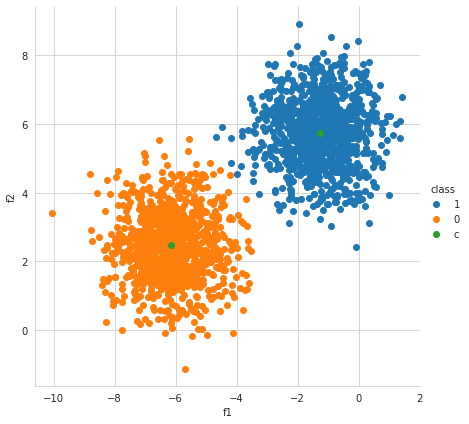

In [76]:
# the black points are centroids
sns.FacetGrid(df_with_centroids,
             hue= "class",
             height=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()